# Validity-Minimality Scatter Plots

Code for generating the scatter plots in the main paper and in the appendix

In [18]:
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg'
import os
import sys
from matplotlib.font_manager import FontProperties
from collections import Counter
sys.path.insert(0, "../src/")
sys.path.insert(0, "..")
from config import REPO_ROOT
from utils import postprocessing, scoring_function
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [19]:
clean_name = {
    'Gemma_2_9B':          'Gemma 2 9B',
    'Gemma_2_27B':         'Gemma 2 27B',
    'Llama-3-1.8B':        'Llama 3.1 8B',
    'llama3_3_70B':       'Llama 3.3 70B',
    'phi4':                'Phi 4',
    'R1-Llama-3.3-70B':    'DeepSeek 70B',
    'gpt4o_mini':'gpt4o_mini',
    "DeepSeek_32B":"DeepSeek_32B",
    "DeepSeek_70B":"DeepSeek_70B",
    'Gemma_3_1B':'Gemma_3_1B',
    'Gemma_3_4B':'Gemma_3_4B',
    'Gemma_3_12B':'Gemma_3_12B',
}
                                                                                                # Good      # Good.
colour_1 = "#596BB3" #, "#ff5c4d" # #ff5c4d, #2166AC 8FD5D6 # 01A5A6      # ADC1DC    # B7D9D2  # 4EA8A1    # 596BB3
colour_2 = "#61A580" #, "#B2182B" E15A9C FC6539 A991DB      # E15A9C      # F2B8B5    # FAD4C0  # 9B7FC8    # 61A580 
colour_1_outline = ""
colour_2_outline = ""
_alpha = 0.6
_size = 85
_axis_size = 13
_x_lim_min = 0.0 #-0.02

temp = 1


In [20]:
# helper: filepaths based on temp
def filepath_helper(temp):
    if temp == 0:
        return REPO_ROOT / "results"
    if temp == 1:
        return REPO_ROOT / "analysis/temperature_1"

## Income

In [21]:
relative = False
metric = "mean"
max = 0.5
filepath_temp = filepath_helper(temp)
annotation = False,
models = ['Gemma_2_27B','llama3_3_70B',"DeepSeek_32B", "DeepSeek_70B", "claude_3_7_sonnet", "gpt4_1", "o3"] #'Gemma_2_9B', 'llama3_1_8B', "gpt4o_mini", "gpt4_1_nano", 

if relative == True:
    app = ""
else:
    app = "_A"



Gemma_2_27B
Unconstrained Validity: 99.42708333333333
Unconstrained AM: 0.14093424783894698
Minimal Validity: 37.1875
Minimal AM: 0.021504803996987076


llama3_3_70B
Unconstrained Validity: 100.0
Unconstrained AM: 0.1388727404482779
Minimal Validity: 15.46875
Minimal AM: 0.02293249870797851


DeepSeek_32B
Unconstrained Validity: 86.33993743482795
Unconstrained AM: 0.1552623625654066
Minimal Validity: 11.839323467230443
Minimal AM: 0.01842961307556834


DeepSeek_70B
Unconstrained Validity: 87.85192909280501
Unconstrained AM: 0.0793078545862339
Minimal Validity: 11.826268969126112
Minimal AM: 0.01714266896190171


claude_3_7_sonnet
Unconstrained Validity: 99.63389121338912
Unconstrained AM: 0.11794281740210892
Minimal Validity: 65.11506276150628
Minimal AM: 0.02442593650077002


gpt4_1
Unconstrained Validity: 99.68684759916493
Unconstrained AM: 0.15202234844623513
Minimal Validity: 48.75
Minimal AM: 0.025483738428526997


o3
Unconstrained Validity: 100.0
Unconstrained AM: 0.16292724362

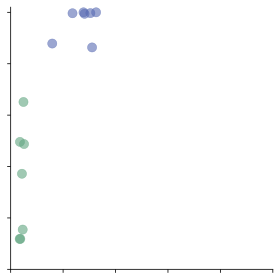

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

# ────────────────────────────────────────────────────────────
# USER‑TUNABLE PARAMETERS
draw_pair_lines = False         # dotted lines between standard & minimal points?

# Individual annotation offsets, in points (dx, dy) -----------------------------
offsets_std = [(0,0)]*len(models)
offsets_min = [(0,0)]*len(models)
# ────────────────────────────────────────────────────────────

min_std = []
val_std = []
min_min = []
val_min = []

for model in models:
    results_std = scoring_function(filepath_temp / f'income/{model}.json', overwrite=False, verbose=0, detail=False)
    results_min = scoring_function(filepath_temp / f'income_minimal/{model}.json', overwrite=False, verbose=0, detail=False)
    print(f"\n\n{model}")
    print(f"Unconstrained Validity: {results_std['validity_percent']}")
    print(f"Unconstrained AM: {results_std[f'{metric}_RCF{app}']}")
    print(f"Minimal Validity: {results_min['validity_percent']}")
    print(f"Minimal AM: {results_min[f'{metric}_RCF{app}']}")
    
    min_std.append(results_std[f'{metric}_RCF{app}'])
    val_std.append(results_std['validity_percent'])
    min_min.append(results_min[f'{metric}_RCF{app}'])
    val_min.append(results_min['validity_percent'])

# ────────────────────────────────────────────────────────────
# Figure setup
fig, ax = plt.subplots(figsize=(4, 4), dpi=150,zorder=0)

# Subtle grid & minimalist spines ----------------------------------------------
ax.set_axisbelow(True)
# Major grid (0.5 steps)
# ax.grid(which='major', linestyle='--', linewidth=0.5, alpha=0.6)
# # Minor grid (0.25 steps for finer guidance, lighter)
# ax.grid(which='minor', linestyle=':', linewidth=0.4, alpha=0.3)

for spine in ['top', 'right']:
    spine_obj = ax.spines[spine]
    spine_obj.set_visible(False)

ax.spines['left'].set_zorder(0)
ax.spines['bottom'].set_zorder(1)

# Scatter plots ----------------------------------------------------------------
std_plot = ax.scatter(min_std, val_std, label='Standard',
                      marker='o', s=_size, color=colour_1, linewidth=0.5, zorder=4, clip_on=False, alpha=_alpha)

min_plot = ax.scatter(min_min, val_min, label='Minimal',
                      marker='o', s=_size, color=colour_2, linewidth=0.5, zorder=10, clip_on=False, alpha=_alpha)

if annotation == True:
    # Annotate points --------------------------------------------------------------
    for idx, model in enumerate(models):
        ax.annotate(clean_name.get(model, model),
                    (min_std[idx], val_std[idx]),
                    xytext=offsets_std[idx],
                    textcoords='offset points',
                    fontsize=8)

    for idx, model in enumerate(models):
        ax.annotate(clean_name.get(model, model),
                    (min_min[idx], val_min[idx]),
                    xytext=offsets_min[idx],
                    textcoords='offset points',
                    fontsize=8)

# Axis configuration -----------------------------------------------------------
#ax.set_xlabel('Relative Counterfactual Distance', fontsize=9)
#ax.set_ylabel('Validity (%)', fontsize=9)

# X‑axis ticks every 0.5; minor ticks every 0.25

ax.set_xlim(_x_lim_min, max)

# put a major tick every 0.5 (or whatever spacing you want)
# ax.xaxis.set_major_locator(MultipleLocator(0.05))
#ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))



# Y‑axis
ax.set_ylim(0, 102)
# ax.set_yticks(np.arange(0, 101, 20))
# ax.tick_params(axis='y', labelsize=_axis_size)
# ax.tick_params(axis='x', labelsize=_axis_size)




# ----------------------------------------------------------
# Highlight region (Minimal & Valid) -----------------------
# tri_x = [0, 0, 0.08]
# tri_y = [85, 100, 100]

# ax.fill(tri_x, tri_y, facecolor='#FDAE61', alpha=0.35, zorder=1)
# ax.plot(tri_x + [tri_x[0]],
#         tri_y + [tri_y[0]],
#         linestyle=':',
#         linewidth=0.75,
#         color='darkorange',
#         zorder=1)

# ax.text(0.0025, 94.5, 'Minimal\n& Valid',
#         fontsize=10, color='orangered', ha='left', va='center', zorder=20)

# # Legend -----------------------------------------------------------------------
# legend = ax.legend(frameon=True, fontsize=8, loc='lower right')
# plt.setp(legend.get_title(), fontsize=8)



#### TOGGLE ON AND OFF
ax.set_xticklabels([])   # remove x tick-label text
ax.set_yticklabels([])   # remove y tick-label text


plt.savefig(REPO_ROOT / f"figures/scatter_income_{temp}.png", bbox_inches='tight', dpi=600)
plt.tight_layout()
plt.show()

## House prices

In [23]:
relative = False
metric = "mean"
max = 0.5
annotation = False
models = ['Gemma_2_27B','llama3_3_70B',"DeepSeek_32B", "DeepSeek_70B", "claude_3_7_sonnet", "gpt4_1", "o3"]

if relative == True:
    app = ""
else:
    app = "_A"



Gemma_2_27B
Unconstrained Validity: 100.0
Unconstrained AM: 0.34542283454793504
Minimal Validity: 13.084702907711756
Minimal AM: 0.01031337423780978


llama3_3_70B
Unconstrained Validity: 100.0
Unconstrained AM: 0.40506578942993654
Minimal Validity: 9.25
Minimal AM: 0.015521277535102657


DeepSeek_32B
Unconstrained Validity: 78.24716267339218
Unconstrained AM: 0.3913192519682439
Minimal Validity: 17.160883280757098
Minimal AM: 0.025715138064697385


DeepSeek_70B
Unconstrained Validity: 76.06516290726817
Unconstrained AM: 0.32501300649419795
Minimal Validity: 19.761606022584694
Minimal AM: 0.01763436406377762


claude_3_7_sonnet
Unconstrained Validity: 99.75
Unconstrained AM: 0.39393096137675165
Minimal Validity: 24.625
Minimal AM: 0.06791288161716486


gpt4_1
Unconstrained Validity: 100.0
Unconstrained AM: 0.3925500273553189
Minimal Validity: 19.5
Minimal AM: 0.04440438066824125


o3
Unconstrained Validity: 100.0
Unconstrained AM: 0.41884662803029643
Minimal Validity: 40.337711069418

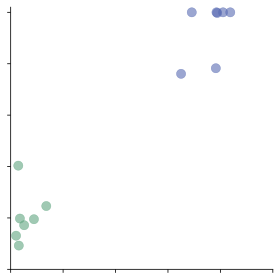

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

# ────────────────────────────────────────────────────────────
# USER‑TUNABLE PARAMETERS
draw_pair_lines = False         # dotted lines between standard & minimal points?

# Individual annotation offsets, in points (dx, dy) -----------------------------
offsets_std = [(0,0)]*len(models)
offsets_min = [(0,0)]*len(models)
# ────────────────────────────────────────────────────────────

min_std = []
val_std = []
min_min = []
val_min = []


for model in models:
    results_std = scoring_function(filepath_temp / f'house_prices/{model}.json', overwrite=False, verbose=0, detail=False)
    results_min = scoring_function(filepath_temp / f'house_prices_minimal/{model}.json', overwrite=False, verbose=0, detail=False)
    print(f"\n\n{model}")
    print(f"Unconstrained Validity: {results_std['validity_percent']}")
    print(f"Unconstrained AM: {results_std[f'{metric}_RCF{app}']}")
    print(f"Minimal Validity: {results_min['validity_percent']}")
    print(f"Minimal AM: {results_min[f'{metric}_RCF{app}']}")
    min_std.append(results_std[f'{metric}_RCF{app}'])
    val_std.append(results_std['validity_percent'])
    min_min.append(results_min[f'{metric}_RCF{app}'])
    val_min.append(results_min['validity_percent'])

print(np.mean(min_std))

# ────────────────────────────────────────────────────────────
# Figure setup
fig, ax = plt.subplots(figsize=(4, 4), dpi=150,zorder=0)

# Subtle grid & minimalist spines ----------------------------------------------
ax.set_axisbelow(True)
# Major grid (0.5 steps)
# ax.grid(which='major', linestyle='--', linewidth=0.5, alpha=0.6)
# # Minor grid (0.25 steps for finer guidance, lighter)
# ax.grid(which='minor', linestyle=':', linewidth=0.4, alpha=0.3)

for spine in ['top', 'right']:
    spine_obj = ax.spines[spine]
    spine_obj.set_visible(False)

ax.spines['left'].set_zorder(0)
ax.spines['bottom'].set_zorder(1)

# Scatter plots ----------------------------------------------------------------
std_plot = ax.scatter(min_std, val_std, label='Standard',
                      marker='o', s=_size, color=colour_1, linewidth=0.5, zorder=4, clip_on=False, alpha=_alpha)

min_plot = ax.scatter(min_min, val_min, label='Minimal',
                      marker='o', s=_size, color=colour_2, linewidth=0.5, zorder=10, clip_on=False, alpha=_alpha)

if annotation == True:
    # Annotate points --------------------------------------------------------------
    for idx, model in enumerate(models):
        ax.annotate(clean_name.get(model, model),
                    (min_std[idx], val_std[idx]),
                    xytext=offsets_std[idx],
                    textcoords='offset points',
                    fontsize=8)

    for idx, model in enumerate(models):
        ax.annotate(clean_name.get(model, model),
                    (min_min[idx], val_min[idx]),
                    xytext=offsets_min[idx],
                    textcoords='offset points',
                    fontsize=8)

# Axis configuration -----------------------------------------------------------
#ax.set_xlabel('Relative Counterfactual Distance', fontsize=9)
#ax.set_ylabel('Validity (%)', fontsize=9)

# X‑axis ticks every 0.5; minor ticks every 0.25
ax.set_xlim(_x_lim_min, max)
# major_xticks = np.arange(0, max, max/4)
# ax.set_xticks(major_xticks)
# ax.set_xticklabels([f'{t:.1f}' if t != 0 else '0' for t in major_xticks], fontsize=8)

# ax.xaxis.set_minor_locator(MultipleLocator(0.05))
# ax.tick_params(axis='x', which='minor', length=2)

# Y‑axis
ax.set_ylim(0, 102)
# ax.set_yticks(np.arange(0, 101, 20))
# ax.tick_params(axis='y', labelsize=_axis_size)
# ax.tick_params(axis='x', labelsize=_axis_size)

ax.set_yticklabels([])  
ax.set_xticklabels([])  
# ----------------------------------------------------------
# # Highlight region (Minimal & Valid) -----------------------
# tri_x = [0, 0, 0.08]
# tri_y = [85, 100, 100]

# ax.fill(tri_x, tri_y, facecolor='#FDAE61', alpha=0.35, zorder=1)
# ax.plot(tri_x + [tri_x[0]],
#         tri_y + [tri_y[0]],
#         linestyle=':',
#         linewidth=0.75,
#         color='darkorange',
#         zorder=1)

# ax.text(0.0045, 94.5, 'Minimal\n& Valid',
#         fontsize=9, color='orangered', ha='left', va='center', zorder=20)

plt.savefig(REPO_ROOT / f"figures/scatter_house_prices_{temp}.png", bbox_inches='tight', dpi=600)

# # Legend -----------------------------------------------------------------------
# legend = ax.legend(frameon=True, fontsize=8, loc='lower right')
# plt.setp(legend.get_title(), fontsize=8)

plt.tight_layout()
plt.show()

## Heart disease

In [25]:
relative = False
metric = "mean"
max = 0.5
annotation = False
models = ['Gemma_2_27B','llama3_3_70B',"DeepSeek_32B", "DeepSeek_70B", "claude_3_7_sonnet", "gpt4_1", "o3"]

if relative == True:
    app = ""
else:
    app = "_A"



Gemma_2_27B
Unconstrained Validity: 100.0
Unconstrained AM: 0.17971701560876802
Minimal Validity: 33.33333333333333
Minimal AM: 0.012899619175911136


llama3_3_70B
Unconstrained Validity: 100.0
Unconstrained AM: 0.29994650084279045
Minimal Validity: 25.271317829457363
Minimal AM: 0.01223341927907462


DeepSeek_32B
Unconstrained Validity: 94.88250652741515
Unconstrained AM: 0.37659013993939694
Minimal Validity: 37.89414414414414
Minimal AM: 0.02833262535108234


DeepSeek_70B
Unconstrained Validity: 86.36601992658626
Unconstrained AM: 0.2993819917669225
Minimal Validity: 29.613259668508285
Minimal AM: 0.009634860766940374


claude_3_7_sonnet
Unconstrained Validity: 99.94834710743802
Unconstrained AM: 0.4619342919429451
Minimal Validity: 25.77479338842975
Minimal AM: 0.06990409368473685


gpt4_1
Unconstrained Validity: 100.0
Unconstrained AM: 0.34778445861533225
Minimal Validity: 18.956611570247933
Minimal AM: 0.0054885157934651384


o3
Unconstrained Validity: 100.0
Unconstrained AM: 0.

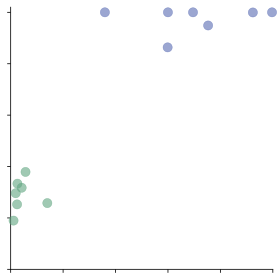

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

# ────────────────────────────────────────────────────────────
# USER‑TUNABLE PARAMETERS
draw_pair_lines = False         # dotted lines between standard & minimal points?

# Individual annotation offsets, in points (dx, dy) -----------------------------
offsets_std = [(-40, 5), (-25, -12), (5, 5), (-10, 5),(5, 5),(5, 5)]
offsets_min = [(5, 5), (5, 5), (7, -3), (5, 5),(5, 5),(5, 5)]
# ────────────────────────────────────────────────────────────

min_std = []
val_std = []
min_min = []
val_min = []


for model in models:
    results_std = scoring_function(filepath_temp / f'heart_disease/{model}.json', overwrite=False, verbose=0, detail=False)
    results_min = scoring_function(filepath_temp / f'heart_disease_minimal/{model}.json', overwrite=False, verbose=0, detail=False)
    print(f"\n\n{model}")
    print(f"Unconstrained Validity: {results_std['validity_percent']}")
    print(f"Unconstrained AM: {results_std[f'{metric}_RCF{app}']}")
    print(f"Minimal Validity: {results_min['validity_percent']}")
    print(f"Minimal AM: {results_min[f'{metric}_RCF{app}']}")
    min_std.append(results_std[f'{metric}_RCF{app}'])
    val_std.append(results_std['validity_percent'])
    min_min.append(results_min[f'{metric}_RCF{app}'])
    val_min.append(results_min['validity_percent'])

# ────────────────────────────────────────────────────────────
# Figure setup
fig, ax = plt.subplots(figsize=(4, 4), dpi=150,zorder=0)

# Subtle grid & minimalist spines ----------------------------------------------
ax.set_axisbelow(True)
# Major grid (0.5 steps)
# ax.grid(which='major', linestyle='--', linewidth=0.5, alpha=0.6)
# # Minor grid (0.25 steps for finer guidance, lighter)
# ax.grid(which='minor', linestyle=':', linewidth=0.4, alpha=0.3)

for spine in ['top', 'right']:
    spine_obj = ax.spines[spine]
    spine_obj.set_visible(False)

ax.spines['left'].set_zorder(0)
ax.spines['bottom'].set_zorder(1)

# Scatter plots ----------------------------------------------------------------
std_plot = ax.scatter(min_std, val_std, label='                ',
                      marker='o', s=_size, color=colour_1, linewidth=0.5, zorder=4, clip_on=False, alpha=_alpha)

min_plot = ax.scatter(min_min, val_min, label='                ',
                      marker='o', s=_size, color=colour_2, linewidth=0.5, zorder=10, clip_on=False, alpha=_alpha)

if annotation == True:
    # Annotate points --------------------------------------------------------------
    for idx, model in enumerate(models):
        ax.annotate(clean_name.get(model, model),
                    (min_std[idx], val_std[idx]),
                    xytext=offsets_std[idx],
                    textcoords='offset points',
                    fontsize=8)

    for idx, model in enumerate(models):
        ax.annotate(clean_name.get(model, model),
                    (min_min[idx], val_min[idx]),
                    xytext=offsets_min[idx],
                    textcoords='offset points',
                    fontsize=8)

# Axis configuration -----------------------------------------------------------
#ax.set_xlabel('Relative Counterfactual Distance', fontsize=9)
#ax.set_ylabel('Validity (%)', fontsize=9)

# X‑axis ticks every 0.5; minor ticks every 0.25
ax.set_xlim(_x_lim_min, max)
# major_xticks = np.arange(0, max, max/4)
# ax.set_xticks(major_xticks)
# ax.set_xticklabels([f'{t:.1f}' if t != 0 else '0' for t in major_xticks], fontsize=8)

# ax.xaxis.set_minor_locator(MultipleLocator(0.5))
# ax.tick_params(axis='x', which='minor', length=3)

# Y‑axis
ax.set_ylim(0, 102)
# ax.set_yticks(np.arange(0, 101, 20))
# ax.tick_params(axis='y', labelsize=_axis_size)
# ax.tick_params(axis='x', labelsize=_axis_size)

# ----------------------------------------------------------
# Highlight region (Minimal & Valid) -----------------------
# tri_x = [0, 0, 0.08]
# tri_y = [85, 100, 100]

# ax.fill(tri_x, tri_y, facecolor='#FDAE61', alpha=0.35, zorder=1)
# ax.plot(tri_x + [tri_x[0]],
#         tri_y + [tri_y[0]],
#         linestyle=':',
#         linewidth=0.75,
#         color='darkorange',
#         zorder=1)

# ax.text(0.0045, 94.5, 'Minimal\n& Valid',
#         fontsize=9, color='orangered', ha='left', va='center', zorder=20)


# Legend -----------------------------------------------------------------------
#times_fp = FontProperties(family='Times New Roman', size=10)  # size matches your code
# legend = ax.legend(frameon=True, loc='lower right',fontsize=11)
# plt.setp(legend.get_title(), fontsize=10)
ax.set_yticklabels([])  
ax.set_xticklabels([])  

plt.savefig(REPO_ROOT / f"figures/scatter_heart_disease_{temp}.png", bbox_inches='tight', dpi=600)


plt.tight_layout()
plt.show()

In [27]:
unconstrained = [
    0.00, 0.00, 0.15,   # Gemma 2 27B
    3.33, 0.00, 0.00,   # Llama 3.3 70B
    6.89, 0.06, 0.05,   # DeepSeek-R1 32B
    19.7, 0.19, 0.42,   # DeepSeek-R1 70B
    9.95, 0.00, 0.00,   # Claude Sonnet 3.7
    15.7, 0.00, 0.00,   # GPT-4.1
    4.27, 0.00, 0.00    # o3
]

minimal = [
    31.5, 9.94, 15.9,   # Gemma 2 27B
    8.80, 7.31, 10.9,   # Llama 3.3 70B
    3.94, 11.6, 19.0,   # DeepSeek-R1 32B
    4.22, 13.2, 17.3,   # DeepSeek-R1 70B
    20.7, 9.50, 9.92,   # Claude Sonnet 3.7
    31.1, 11.2, 10.3,   # GPT-4.1
    26.2, 23.9, 17.5    # o3
]


In [28]:
def describe(data):
    arr = np.array(data)
    return arr.mean(), arr.std(ddof=1)

uncon_mean, uncon_sd = describe(unconstrained)
min_mean,  min_sd   = describe(minimal)

print("Unconstrained → mean:", uncon_mean, "sd:", uncon_sd)
print("Minimal       → mean:", min_mean,  "sd:", min_sd)


Unconstrained → mean: 2.8909523809523807 sd: 5.635192015150774
Minimal       → mean: 14.949047619047617 sd: 8.00875639831922
